In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer #for missing data
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier




file_path ='crime.xlsx'
music_data= pd.read_excel(file_path)



music_data.dtypes   #types of data like int, character,..
music_data.isna().sum()  #number of missing data

music_data.dropna(subset=['Crime Description'], inplace=True) #drop data that are output
music_data.isna().sum() #check number of missing data again


x=music_data.drop(columns=['Crime Description'])
y=music_data['Crime Description']

#for missing data
cat_imputer=SimpleImputer(strategy='constant',fill_value='missing')
num_imputer=SimpleImputer(strategy='constant',fill_value=0)


#define column
cat_features=['City','Weapon Used','Victim Gender','Crime Domain']
num_features=['Crime Code','Victim Age','Police Deployed']

#create imputer
imputer=ColumnTransformer([
    ('cat_imputer',cat_imputer,cat_features),
    ('num_imputer',num_imputer,num_features)
])


filled_x=imputer.fit_transform(x)
#filled_x

#checking data got filled
filled_data=pd.DataFrame(filled_x,columns=['City','Weapon Used','Victim Gender','Crime Domain','Crime Code','Victim Age','Police Deployed'])
filled_data.isna().sum()



categorical_features=['City','Weapon Used','Victim Gender','Crime Domain']   #categorical features to convert into number
one_hot=OneHotEncoder()
transformer=ColumnTransformer([('one_hot',one_hot,categorical_features)],remainder='passthrough')
transformed_x=transformer.fit_transform(filled_data)
transformed_x

# Convert sparse matrix to dense
transformed_x = transformed_x.toarray()

# Convert to DataFrame and ensure numeric types
transformed_x = pd.DataFrame(transformed_x).astype(float)



dummies=pd.get_dummies(music_data[['City','Weapon Used','Victim Gender','Crime Domain','Crime Code','Victim Age','Police Deployed']])
dummies





,Crime Code,Victim Age,Police Deployed,City_Agra,City_Ahmedabad,City_Bangalore,City_Bhopal,City_Chennai,City_Delhi,City_Faridabad,...,Weapon Used_Knife,Weapon Used_Other,Weapon Used_Poison,Victim Gender_F,Victim Gender_M,Victim Gender_X,Crime Domain_Fire Accident,Crime Domain_Other Crime,Crime Domain_Traffic Fatality,Crime Domain_Violent Crime
0,576,16,13,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
1,128,37,9,False,False,False,False,True,False,False,...,False,False,True,False,True,False,False,True,False,False
2,271,48,15,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
3,170,49,1,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
4,421,30,18,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40155,312,78,12,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
40156,300,75,2,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
40157,423,68,6,False,False,False,False,False,False,False,...,False,True,False,False,True,False,False,False,False,True
40158,311,11,1,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True


In [2]:
x_train,x_test,y_train,y_test=train_test_split(transformed_x,y,test_size=0.2)
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

prediction=model.predict(x_test)

score=accuracy_score(y_test,prediction)
score*100


18.102589641434264

In [3]:

model2 = RandomForestClassifier(n_estimators=100, random_state=42)  # n_estimators is the number of trees in the forest
model2.fit(x_train, y_train)

prediction2=model2.predict(x_test)

score2=accuracy_score(y_test,prediction2)
print(score2*100)


18.002988047808767


In [6]:
model3 = KNeighborsClassifier(n_neighbors=10)  # n_neighbors is the number of neighbors to use
model3.fit(x_train, y_train)
prediction3=model3.predict(x_test)
score3=accuracy_score(y_test,prediction3)
print(score3*100)


5.552788844621514


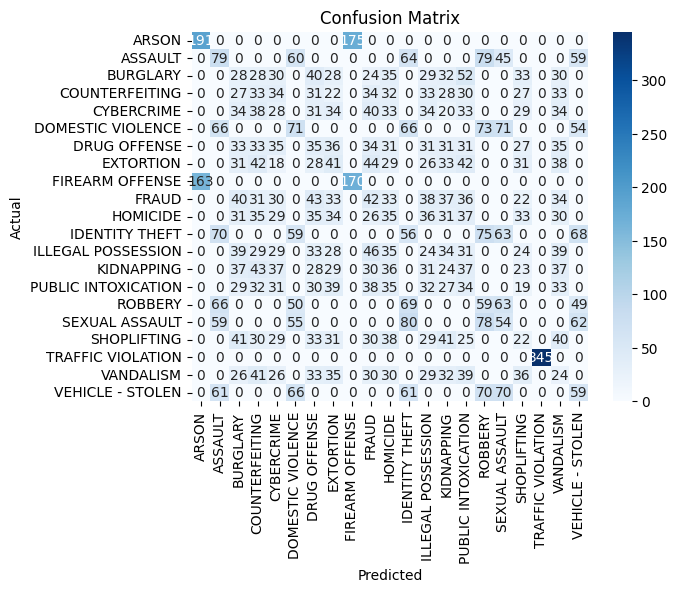

In [4]:
#confusion matrix
conf_matrix = confusion_matrix(y_test, prediction)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

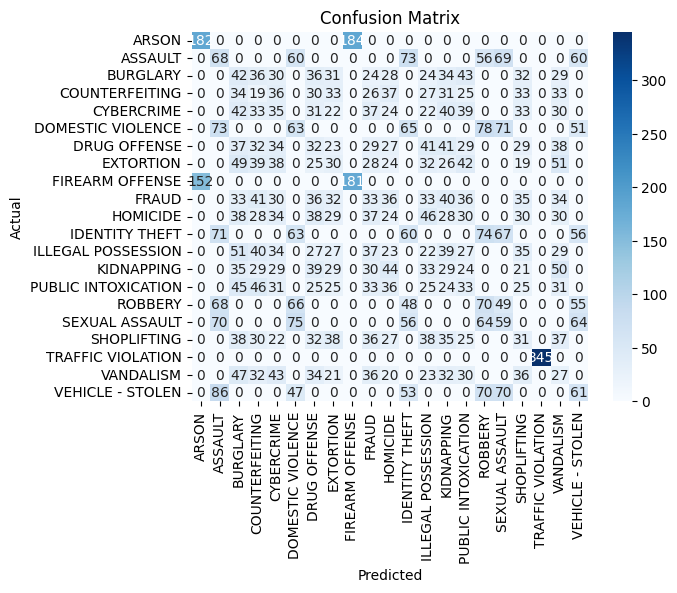

In [7]:
conf_matrix = confusion_matrix(y_test, prediction2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model2.classes_, yticklabels=model2.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

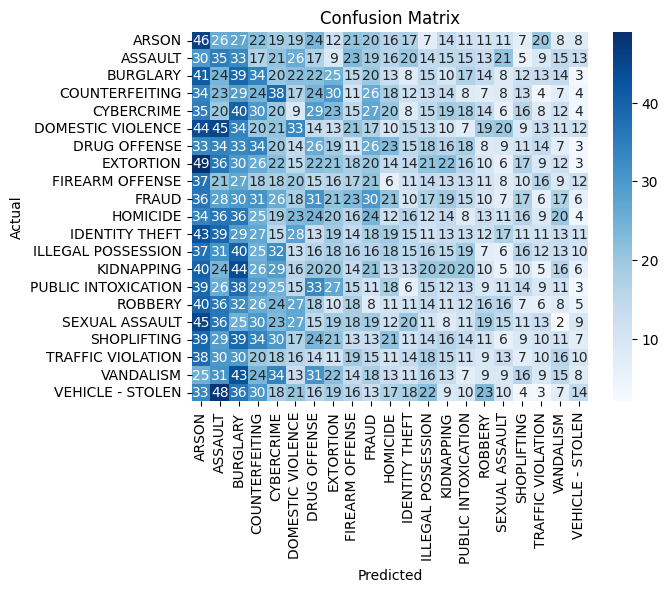

In [8]:
conf_matrix = confusion_matrix(y_test, prediction3)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model3.classes_, yticklabels=model3.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()